##  Data Exploration 


In [19]:
import os
import pandas as pd
import numpy as np
from os.path import dirname, abspath

In [20]:

dfRestaurent = pd.read_csv("E:\\repos\\TMLC-Python\\FileFolder\\Restaurant_revenue.csv")
print("Top 5 rows: \n")
dfRestaurent.head(5) # top 5 rows

Top 5 rows: 



,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


In [21]:
dfRestaurent["Cuisine_Type"].unique()

array(['Japanese', 'Italian', 'American', 'Mexican'], dtype=object)

In [22]:
dfRestaurent.shape

(1000, 8)

In [23]:
dfRestaurent.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

In [46]:
dfRestaurent["Promotions"].unique()


array([0, 1], dtype=int64)

In [24]:
dfRestaurent.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


In [25]:
dfRestaurent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


## Data Visualization 

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Cuisine Type vs. Average Customer Spending

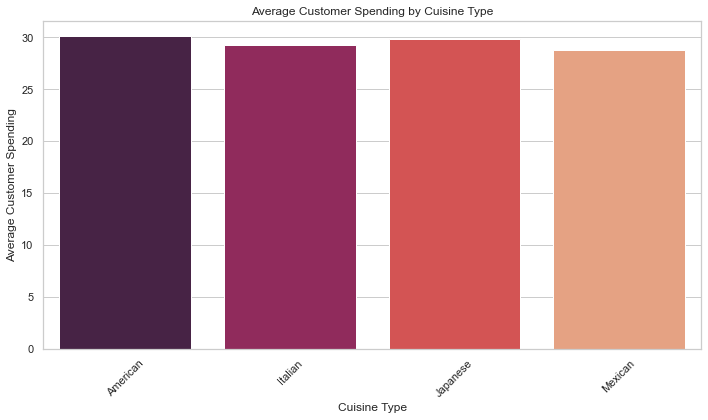

In [79]:

# Calculate average spending per cuisine type
avg_spending_per_cuisine = df.groupby('Cuisine_Type')['Average_Customer_Spending'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Cuisine_Type', y='Average_Customer_Spending', data=avg_spending_per_cuisine, palette='rocket')
plt.title('Average Customer Spending by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Customer Spending')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Number of Customers vs. Monthly Revenue

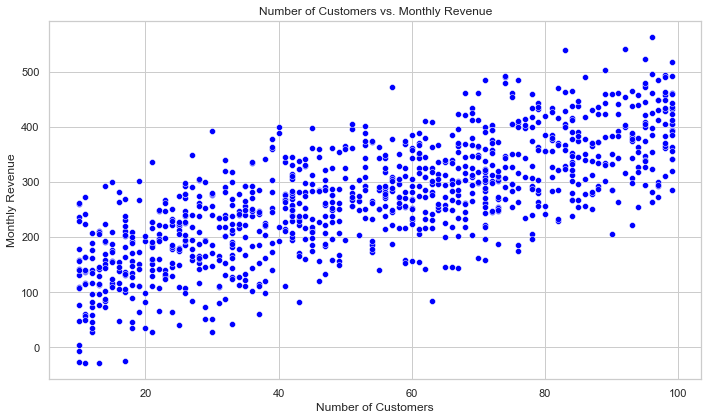

In [81]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number_of_Customers', y='Monthly_Revenue', data=df, color='blue')
plt.title('Number of Customers vs. Monthly Revenue')
plt.xlabel('Number of Customers')
plt.ylabel('Monthly Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Promotions Distribution

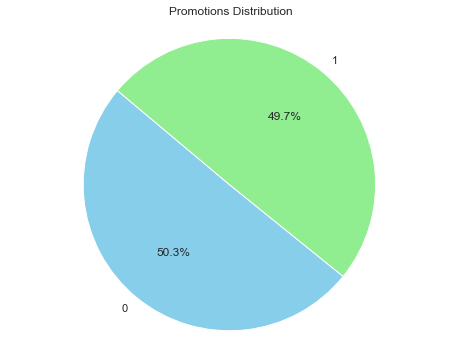

In [59]:
# Count the occurrences of promotions
promotion_counts = df['Promotions'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(promotion_counts, labels=promotion_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Promotions Distribution')
plt.axis('equal')
plt.show()

#### Reviews vs. Monthly Revenue

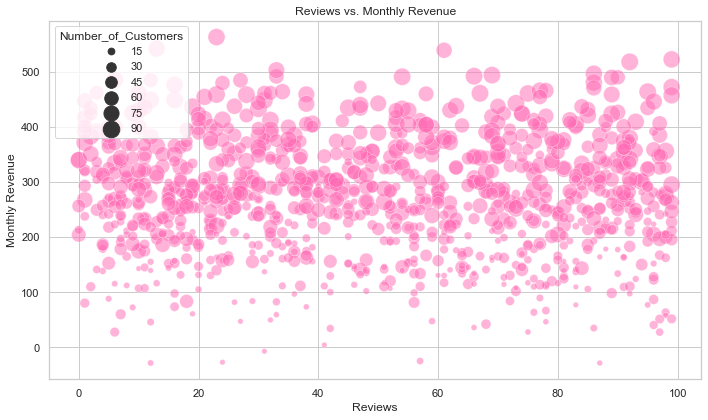

In [77]:
# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Monthly_Revenue', size='Number_of_Customers', data=df, sizes=(30, 300), alpha=0.5, color='hotpink')
plt.title('Reviews vs. Monthly Revenue')
plt.xlabel('Reviews')
plt.ylabel('Monthly Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Marketing Spending Distribution

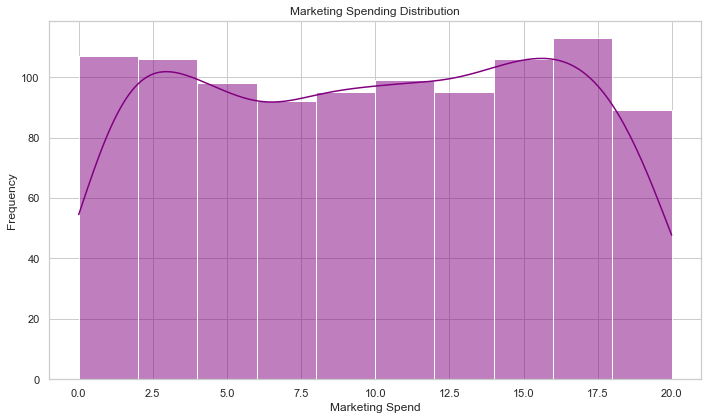

In [73]:
# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['Marketing_Spend'], bins=10, kde=True, color='purple')
plt.title('Marketing Spending Distribution')
plt.xlabel('Marketing Spend')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Menu Price by Cuisine Type

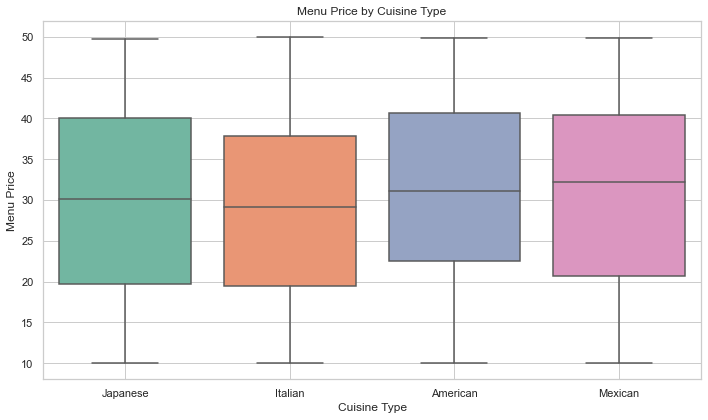

In [83]:

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cuisine_Type', y='Menu_Price', data=df, palette='Set2')
plt.title('Menu Price by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Menu Price')
plt.grid(True)
plt.tight_layout()
plt.show()

<AxesSubplot:>

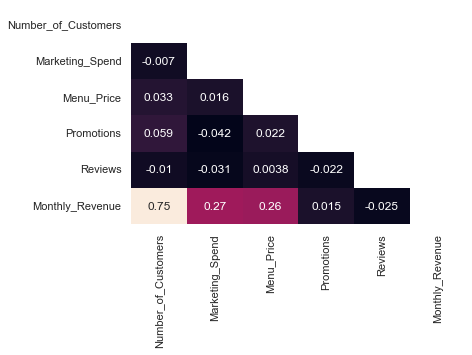

In [40]:
# Check co-relation with target for numeric columns
import seaborn as sns
import numpy as np
corr=dfRestaurent[['Number_of_Customers','Marketing_Spend','Menu_Price','Promotions','Reviews','Monthly_Revenue']].corr()
mask=np.triu(np.ones_like(corr))
sns.heatmap(corr,annot=True,mask=mask,cbar=False)

<AxesSubplot:xlabel='Monthly_Revenue', ylabel='Cuisine_Type'>

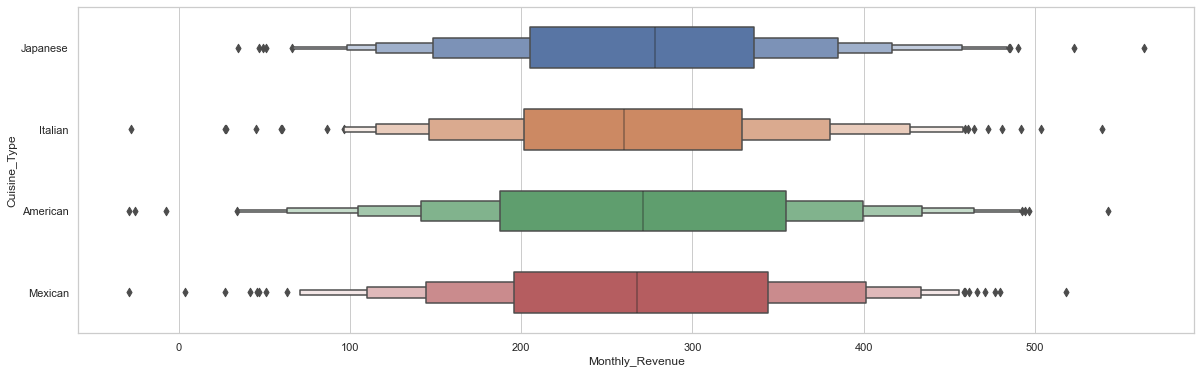

In [39]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxenplot(data=dfRestaurent, x="Monthly_Revenue", y="Cuisine_Type", width=.5)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


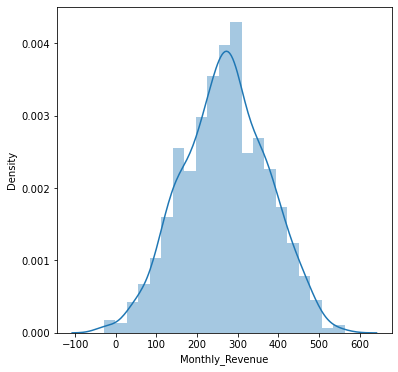

In [28]:
#Plotting a histogram for price column before cleaning
plt.figure(figsize=(6,6))
sns.distplot(dfRestaurent['Monthly_Revenue'])
plt.show()

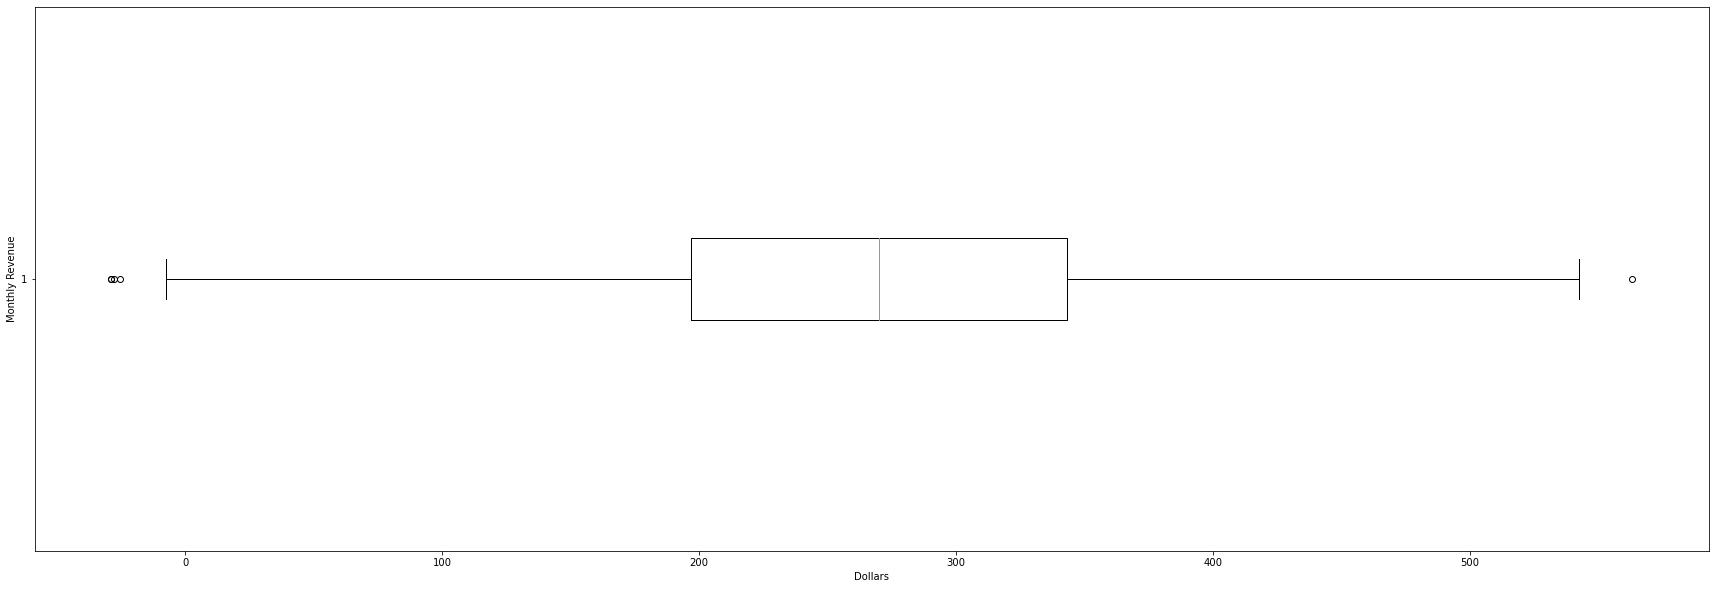

In [29]:
#boxplot for checking the price distribution
plt.figure(figsize = (30,10))
plt.boxplot(dfRestaurent['Monthly_Revenue'], vert = False)
plt.ylabel('Monthly Revenue')
plt.xlabel('Dollars')
plt.show()

## Data Cleaning

In [84]:
dfRestaurent[dfRestaurent['Monthly_Revenue']< 0]

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
54,11,32.620334,5.061169,American,33.761979,1,87,-28.977809
104,10,11.313867,2.279133,Italian,16.075447,1,24,-27.610276
110,17,22.458927,0.874713,American,35.280768,1,57,-25.453430
605,13,36.130521,0.811175,Mexican,43.119059,1,12,-28.920890
735,10,33.087409,6.009788,American,15.333779,1,31,-7.627382


In [86]:
dfRestaurent[dfRestaurent['Menu_Price'] < 0]

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue


#### ** cusine label encoded **

In [87]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the categorical column
dfRestaurent['Cuisine_Type_Encoded'] = label_encoder.fit_transform(dfRestaurent['Cuisine_Type'])
print(dfRestaurent)

     Number_of_Customers  Menu_Price  Marketing_Spend Cuisine_Type  \
0                     61   43.117635        12.663793     Japanese   
1                     24   40.020077         4.577892      Italian   
2                     81   41.981485         4.652911     Japanese   
3                     70   43.005307         4.416053      Italian   
4                     30   17.456199         3.475052      Italian   
..                   ...         ...              ...          ...   
995                   73   41.307842        12.122931     Japanese   
996                   31   20.615496         5.822885      Mexican   
997                   69   17.110656         4.141898     Japanese   
998                   73   37.664722         3.046556     Japanese   
999                   81   34.722067        17.989104      Italian   

     Average_Customer_Spending  Promotions  Reviews  Monthly_Revenue  \
0                    36.236133           0       45       350.912040   
1              

In [88]:
dfRestaurent.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Cuisine_Type_Encoded
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040,2
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091,1
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763,2
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573,1
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121,1


In [89]:
# drop categorical column
dfRestaurent.drop(['Cuisine_Type'], axis = 1, inplace = True)
dfRestaurent.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Cuisine_Type_Encoded
0,61,43.117635,12.663793,36.236133,0,45,350.912040,2
1,24,40.020077,4.577892,17.952562,0,36,221.319091,1
2,81,41.981485,4.652911,22.600420,1,91,326.529763,2
3,70,43.005307,4.416053,18.984098,1,59,348.190573,1
4,30,17.456199,3.475052,12.766143,1,30,185.009121,1


## Model building 

In [90]:
# Model Building

X = dfRestaurent.drop(['Monthly_Revenue'], axis=1)  #independent
y = dfRestaurent['Monthly_Revenue']  #dependent/target

In [91]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [92]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression()  #object
linear.fit(X_train, y_train)

LinearRegression()

In [94]:
y_pred = linear.predict(x_test)
y_pred

array([125.2794866 , 413.60416766, 327.69181327, 377.78448231,
       420.28178531, 362.17190531, 307.90425578, 311.49826465,
       346.73271269, 331.01419777, 342.22918133, 121.80997077,
       170.51858105, 400.24365122, 212.27509394, 423.63971412,
       289.68056793, 320.22640123, 129.37653954, 365.27516816,
       383.05607503, 378.91611892, 178.64584566, 271.63776301,
       163.33171899, 153.94731415, 287.12799041, 404.72125442,
       416.10550705, 178.80667544, 147.58676056, 409.92813001,
       460.82640427, 383.77595998, 373.81953043, 261.14000958,
       406.72805038, 264.37095288, 136.33576974, 194.59658328,
       322.09087095, 168.68636159, 300.86861484, 264.2514317 ,
       312.41439621, 133.73281006, 362.41415301, 315.17326612,
       279.85431206, 233.90881991, 182.28485779, 246.357258  ,
       134.20868257, 276.75715996, 169.59694163, 317.24525384,
       122.88606033, 276.97086969, 342.76919867, 258.3708286 ,
       204.27345369, 392.39913481, 162.82595698, 308.48

In [95]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

46.36663306689175

In [97]:
### XgBoost
from xgboost import XGBRegressor

xgb = XGBRegressor()

In [98]:
xgb.fit(X_train, y_train)

y_pred_2 = xgb.predict(x_test)

In [99]:
mean_absolute_error(y_test, y_pred_2)

52.23776264805122

## Normalization 

In [101]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [102]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
linear = LinearRegression()  #object


In [103]:
X_train_norm = X_train.copy()
X_test_norm = x_test.copy()

norm = MinMaxScaler().fit(X_train_norm)
X_train_norm_transform = norm.transform(X_train_norm)

X_test_norm_transform = norm.transform(X_test_norm)
print(X_test_norm_transform)

[[0.         0.17057803 0.54626662 ... 0.         0.12121212 1.        ]
 [0.97752809 0.59733745 0.55397742 ... 1.         0.1010101  1.        ]
 [0.52808989 0.79580783 0.787539   ... 1.         0.71717172 0.33333333]
 ...
 [0.34831461 0.40536892 0.74566049 ... 0.         0.53535354 0.        ]
 [0.14606742 0.09510806 0.38318976 ... 1.         0.47474747 0.        ]
 [0.24719101 0.86752315 0.74315363 ... 1.         0.15151515 0.66666667]]


#### Apply Normalization 

In [104]:
linear_norm = LinearRegression()  #object
linear_norm.fit(X_train_norm_transform, y_train)

y_pred_norm = linear_norm.predict(X_test_norm_transform)
mean_absolute_error(y_test, y_pred_norm)


46.36663306689174

##  Standardization 

In [105]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

X_train_stand = X_train.copy()
X_test_stand = x_test.copy()

num_cols = X_train_stand.select_dtypes(include= 'number')

for i in num_cols: 
    scale = ss.fit(X_train_stand[[i]])
    X_train_stand[i] = ss.transform(X_train_stand[[i]])
    X_test_stand[i] = ss.transform(X_test_stand[[i]])


X_train_stand.head()
X_test_stand.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Cuisine_Type_Encoded
993,-1.630399,-1.203801,0.152457,1.765477,-0.990050,-1.291231,1.301038
859,1.697921,0.307237,0.178550,0.488473,1.010051,-1.359645,1.301038
298,0.167659,1.009966,0.968907,-1.206877,1.010051,0.726985,-0.469082
553,1.047560,-0.099210,1.320810,-1.076412,-0.990050,0.590157,-1.354141
672,1.774435,1.553033,-0.417457,0.643141,-0.990050,1.342712,-1.354141


#### Applying Standardization

In [106]:
linear_stand = LinearRegression()  #object
linear_stand.fit(X_train_stand, y_train)

y_pred_stand = linear_stand.predict(X_test_stand)
mean_absolute_error(y_test, y_pred_stand)


46.36663306689174

In [107]:
xgb_stand = XGBRegressor()
xgb_stand.fit(X_train_stand, y_train)
y_xgb = xgb_stand.predict(X_test_stand)

In [108]:
mean_absolute_error(y_test, y_xgb)

52.23776264805122